In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv('Housing.csv')

In [3]:
print(data.head())
print(data.info())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

In [4]:
summary = data.describe()
summary = summary.transpose()
print(summary)

           count          mean           std        min        25%        50%  \
price      545.0  4.766729e+06  1.870440e+06  1750000.0  3430000.0  4340000.0   
area       545.0  5.150541e+03  2.170141e+03     1650.0     3600.0     4600.0   
bedrooms   545.0  2.965138e+00  7.380639e-01        1.0        2.0        3.0   
bathrooms  545.0  1.286239e+00  5.024696e-01        1.0        1.0        1.0   
stories    545.0  1.805505e+00  8.674925e-01        1.0        1.0        2.0   
parking    545.0  6.935780e-01  8.615858e-01        0.0        0.0        0.0   

                 75%         max  
price      5740000.0  13300000.0  
area          6360.0     16200.0  
bedrooms         3.0         6.0  
bathrooms        2.0         4.0  
stories          2.0         4.0  
parking          1.0         3.0  


In [5]:
#labelEncoder 
data['mainroad']=pd.get_dummies(data.mainroad).values
data['guestroom']=pd.get_dummies(data.guestroom).values
data['basement']=pd.get_dummies(data.basement).values
data['hotwaterheating']=pd.get_dummies(data.hotwaterheating).values
data['airconditioning']=pd.get_dummies(data.airconditioning).values
data['prefarea']=pd.get_dummies(data.prefarea).values
data['furnishingstatus']=pd.get_dummies(data.furnishingstatus).values

In [6]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,0,1,1,1,0,2,0,1
1,12250000,8960,4,4,4,0,1,1,1,0,3,1,1
2,12250000,9960,3,2,2,0,1,0,1,1,2,0,0
3,12215000,7500,4,2,2,0,1,0,1,0,3,0,1
4,11410000,7420,4,1,2,0,0,0,1,0,2,1,1


In [8]:
from sklearn.model_selection import train_test_split
X = data.drop('price', axis = 1)
print('X shape = ',X.shape)
Y = data['price']
print('Y shape = ',Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 5)

X shape =  (545, 12)
Y shape =  (545,)


In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [12]:
#import keras
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics

#first input and first hidden layer
model = Sequential()
model.add(Dense(20,input_dim=12, activation='relu'))

#second hidden layer
model.add(Dense(10, activation='relu'))

#output layer
model.add(Dense(1, activation='linear'))

#compile ANN
model.compile(optimizer="Adam", loss='mean_squared_error', metrics=['accuracy'])

In [13]:
#fit and display the summary 
model.fit(X_train,Y_train, epochs=1000, verbose=1)

Epoch 1/1000
12/12 [==============================] - 1s 2ms/step - loss: 28053176582144.0000 - accuracy: 0.0000e+00
Epoch 2/1000
12/12 [==============================] - 0s 2ms/step - loss: 28053178679296.0000 - accuracy: 0.0000e+00
Epoch 3/1000
12/12 [==============================] - 0s 1ms/step - loss: 28053176582144.0000 - accuracy: 0.0000e+00
Epoch 4/1000
12/12 [==============================] - 0s 1ms/step - loss: 28053176582144.0000 - accuracy: 0.0000e+00
Epoch 5/1000
12/12 [==============================] - 0s 1ms/step - loss: 28053176582144.0000 - accuracy: 0.0000e+00
Epoch 6/1000
12/12 [==============================] - 0s 1ms/step - loss: 28053178679296.0000 - accuracy: 0.0000e+00
Epoch 7/1000
12/12 [==============================] - 0s 2ms/step - loss: 28053174484992.0000 - accuracy: 0.0000e+00
Epoch 8/1000
12/12 [==============================] - 0s 1ms/step - loss: 28053176582144.0000 - accuracy: 0.0000e+00
Epoch 9/1000
12/12 [==============================] - 0s 1ms/ste

12/12 [==============================] - 0s 1ms/step - loss: 28046404878336.0000 - accuracy: 0.0000e+00
Epoch 71/1000
12/12 [==============================] - 0s 1ms/step - loss: 28046090305536.0000 - accuracy: 0.0000e+00
Epoch 72/1000
12/12 [==============================] - 0s 1ms/step - loss: 28045769441280.0000 - accuracy: 0.0000e+00
Epoch 73/1000
12/12 [==============================] - 0s 1ms/step - loss: 28045442285568.0000 - accuracy: 0.0000e+00
Epoch 74/1000
12/12 [==============================] - 0s 1ms/step - loss: 28045108838400.0000 - accuracy: 0.0000e+00
Epoch 75/1000
12/12 [==============================] - 0s 1ms/step - loss: 28044756516864.0000 - accuracy: 0.0000e+00
Epoch 76/1000
12/12 [==============================] - 0s 1ms/step - loss: 28044408389632.0000 - accuracy: 0.0000e+00
Epoch 77/1000
12/12 [==============================] - 0s 1ms/step - loss: 28044043485184.0000 - accuracy: 0.0000e+00
Epoch 78/1000
12/12 [==============================] - 0s 1ms/step - l

12/12 [==============================] - 0s 1ms/step - loss: 28001836204032.0000 - accuracy: 0.0000e+00
Epoch 140/1000
12/12 [==============================] - 0s 1ms/step - loss: 28000796016640.0000 - accuracy: 0.0000e+00
Epoch 141/1000
12/12 [==============================] - 0s 1ms/step - loss: 27999768412160.0000 - accuracy: 0.0000e+00
Epoch 142/1000
12/12 [==============================] - 0s 1ms/step - loss: 27998711447552.0000 - accuracy: 0.0000e+00
Epoch 143/1000
12/12 [==============================] - 0s 1ms/step - loss: 27997646094336.0000 - accuracy: 0.0000e+00
Epoch 144/1000
12/12 [==============================] - 0s 1ms/step - loss: 27996561866752.0000 - accuracy: 0.0000e+00
Epoch 145/1000
12/12 [==============================] - 0s 1ms/step - loss: 27995479736320.0000 - accuracy: 0.0000e+00
Epoch 146/1000
12/12 [==============================] - 0s 1ms/step - loss: 27994391314432.0000 - accuracy: 0.0000e+00
Epoch 147/1000
12/12 [==============================] - 0s 1ms/

Epoch 208/1000
12/12 [==============================] - 0s 1ms/step - loss: 27901491675136.0000 - accuracy: 0.0000e+00
Epoch 209/1000
12/12 [==============================] - 0s 1ms/step - loss: 27899606335488.0000 - accuracy: 0.0000e+00
Epoch 210/1000
12/12 [==============================] - 0s 1ms/step - loss: 27897649692672.0000 - accuracy: 0.0000e+00
Epoch 211/1000
12/12 [==============================] - 0s 1ms/step - loss: 27895711924224.0000 - accuracy: 0.0000e+00
Epoch 212/1000
12/12 [==============================] - 0s 1ms/step - loss: 27893748989952.0000 - accuracy: 0.0000e+00
Epoch 213/1000
12/12 [==============================] - 0s 1ms/step - loss: 27891796541440.0000 - accuracy: 0.0000e+00
Epoch 214/1000
12/12 [==============================] - 0s 1ms/step - loss: 27889814732800.0000 - accuracy: 0.0000e+00
Epoch 215/1000
12/12 [==============================] - 0s 1ms/step - loss: 27887835021312.0000 - accuracy: 0.0000e+00
Epoch 216/1000
12/12 [==========================

12/12 [==============================] - 0s 1ms/step - loss: 27739704786944.0000 - accuracy: 0.0000e+00
Epoch 277/1000
12/12 [==============================] - 0s 1ms/step - loss: 27736810717184.0000 - accuracy: 0.0000e+00
Epoch 278/1000
12/12 [==============================] - 0s 1ms/step - loss: 27733914550272.0000 - accuracy: 0.0000e+00
Epoch 279/1000
12/12 [==============================] - 0s 1ms/step - loss: 27731007897600.0000 - accuracy: 0.0000e+00
Epoch 280/1000
12/12 [==============================] - 0s 1ms/step - loss: 27728122216448.0000 - accuracy: 0.0000e+00
Epoch 281/1000
12/12 [==============================] - 0s 1ms/step - loss: 27725175717888.0000 - accuracy: 0.0000e+00
Epoch 282/1000
12/12 [==============================] - 0s 1ms/step - loss: 27722227122176.0000 - accuracy: 0.0000e+00
Epoch 283/1000
12/12 [==============================] - 0s 1ms/step - loss: 27719284817920.0000 - accuracy: 0.0000e+00
Epoch 284/1000
12/12 [==============================] - 0s 1ms/

Epoch 345/1000
12/12 [==============================] - 0s 1ms/step - loss: 27506306449408.0000 - accuracy: 0.0000e+00
Epoch 346/1000
12/12 [==============================] - 0s 1ms/step - loss: 27502399455232.0000 - accuracy: 0.0000e+00
Epoch 347/1000
12/12 [==============================] - 0s 1ms/step - loss: 27498419060736.0000 - accuracy: 0.0000e+00
Epoch 348/1000
12/12 [==============================] - 0s 1ms/step - loss: 27494478512128.0000 - accuracy: 0.0000e+00
Epoch 349/1000
12/12 [==============================] - 0s 1ms/step - loss: 27490510700544.0000 - accuracy: 0.0000e+00
Epoch 350/1000
12/12 [==============================] - 0s 1ms/step - loss: 27486553374720.0000 - accuracy: 0.0000e+00
Epoch 351/1000
12/12 [==============================] - 0s 1ms/step - loss: 27482554105856.0000 - accuracy: 0.0000e+00
Epoch 352/1000
12/12 [==============================] - 0s 1ms/step - loss: 27478512893952.0000 - accuracy: 0.0000e+00
Epoch 353/1000
12/12 [==========================

12/12 [==============================] - 0s 1ms/step - loss: 27203775496192.0000 - accuracy: 0.0000e+00
Epoch 414/1000
12/12 [==============================] - 0s 1ms/step - loss: 27198757011456.0000 - accuracy: 0.0000e+00
Epoch 415/1000
12/12 [==============================] - 0s 1ms/step - loss: 27193723846656.0000 - accuracy: 0.0000e+00
Epoch 416/1000
12/12 [==============================] - 0s 1ms/step - loss: 27188749402112.0000 - accuracy: 0.0000e+00
Epoch 417/1000
12/12 [==============================] - 0s 1ms/step - loss: 27183649128448.0000 - accuracy: 0.0000e+00
Epoch 418/1000
12/12 [==============================] - 0s 1ms/step - loss: 27178578214912.0000 - accuracy: 0.0000e+00
Epoch 419/1000
12/12 [==============================] - 0s 1ms/step - loss: 27173517787136.0000 - accuracy: 0.0000e+00
Epoch 420/1000
12/12 [==============================] - 0s 1ms/step - loss: 27168398639104.0000 - accuracy: 0.0000e+00
Epoch 421/1000
12/12 [==============================] - 0s 1ms/

Epoch 482/1000
12/12 [==============================] - 0s 1ms/step - loss: 26819346563072.0000 - accuracy: 0.0000e+00
Epoch 483/1000
12/12 [==============================] - 0s 1ms/step - loss: 26813118021632.0000 - accuracy: 0.0000e+00
Epoch 484/1000
12/12 [==============================] - 0s 1ms/step - loss: 26806983852032.0000 - accuracy: 0.0000e+00
Epoch 485/1000
12/12 [==============================] - 0s 1ms/step - loss: 26800765796352.0000 - accuracy: 0.0000e+00
Epoch 486/1000
12/12 [==============================] - 0s 1ms/step - loss: 26794619043840.0000 - accuracy: 0.0000e+00
Epoch 487/1000
12/12 [==============================] - 0s 1ms/step - loss: 26788258381824.0000 - accuracy: 0.0000e+00
Epoch 488/1000
12/12 [==============================] - 0s 1ms/step - loss: 26782046617600.0000 - accuracy: 0.0000e+00
Epoch 489/1000
12/12 [==============================] - 0s 1ms/step - loss: 26775818076160.0000 - accuracy: 0.0000e+00
Epoch 490/1000
12/12 [==========================

12/12 [==============================] - 0s 1ms/step - loss: 26360879775744.0000 - accuracy: 0.0000e+00
Epoch 551/1000
12/12 [==============================] - 0s 1ms/step - loss: 26353558618112.0000 - accuracy: 0.0000e+00
Epoch 552/1000
12/12 [==============================] - 0s 1ms/step - loss: 26346140991488.0000 - accuracy: 0.0000e+00
Epoch 553/1000
12/12 [==============================] - 0s 1ms/step - loss: 26338840805376.0000 - accuracy: 0.0000e+00
Epoch 554/1000
12/12 [==============================] - 0s 1ms/step - loss: 26331389624320.0000 - accuracy: 0.0000e+00
Epoch 555/1000
12/12 [==============================] - 0s 1ms/step - loss: 26323955220480.0000 - accuracy: 0.0000e+00
Epoch 556/1000
12/12 [==============================] - 0s 1ms/step - loss: 26316594216960.0000 - accuracy: 0.0000e+00
Epoch 557/1000
12/12 [==============================] - 0s 1ms/step - loss: 26309107384320.0000 - accuracy: 0.0000e+00
Epoch 558/1000
12/12 [==============================] - 0s 1ms/

Epoch 619/1000
12/12 [==============================] - 0s 1ms/step - loss: 25812292075520.0000 - accuracy: 0.0000e+00
Epoch 620/1000
12/12 [==============================] - 0s 1ms/step - loss: 25803555340288.0000 - accuracy: 0.0000e+00
Epoch 621/1000
12/12 [==============================] - 0s 1ms/step - loss: 25795091234816.0000 - accuracy: 0.0000e+00
Epoch 622/1000
12/12 [==============================] - 0s 1ms/step - loss: 25786564214784.0000 - accuracy: 0.0000e+00
Epoch 623/1000
12/12 [==============================] - 0s 1ms/step - loss: 25777825382400.0000 - accuracy: 0.0000e+00
Epoch 624/1000
12/12 [==============================] - 0s 1ms/step - loss: 25769178824704.0000 - accuracy: 0.0000e+00
Epoch 625/1000
12/12 [==============================] - 0s 1ms/step - loss: 25760515489792.0000 - accuracy: 0.0000e+00
Epoch 626/1000
12/12 [==============================] - 0s 1ms/step - loss: 25751780851712.0000 - accuracy: 0.0000e+00
Epoch 627/1000
12/12 [==========================

12/12 [==============================] - 0s 1ms/step - loss: 25187613409280.0000 - accuracy: 0.0000e+00
Epoch 688/1000
12/12 [==============================] - 0s 1ms/step - loss: 25177746309120.0000 - accuracy: 0.0000e+00
Epoch 689/1000
12/12 [==============================] - 0s 1ms/step - loss: 25168097312768.0000 - accuracy: 0.0000e+00
Epoch 690/1000
12/12 [==============================] - 0s 1ms/step - loss: 25158286835712.0000 - accuracy: 0.0000e+00
Epoch 691/1000
12/12 [==============================] - 0s 1ms/step - loss: 25148314877952.0000 - accuracy: 0.0000e+00
Epoch 692/1000
12/12 [==============================] - 0s 1ms/step - loss: 25138475040768.0000 - accuracy: 0.0000e+00
Epoch 693/1000
12/12 [==============================] - 0s 1ms/step - loss: 25128584871936.0000 - accuracy: 0.0000e+00
Epoch 694/1000
12/12 [==============================] - 0s 1ms/step - loss: 25118600331264.0000 - accuracy: 0.0000e+00
Epoch 695/1000
12/12 [==============================] - 0s 1ms/

Epoch 756/1000
12/12 [==============================] - 0s 1ms/step - loss: 24468036517888.0000 - accuracy: 0.0000e+00
Epoch 757/1000
12/12 [==============================] - 0s 1ms/step - loss: 24456831434752.0000 - accuracy: 0.0000e+00
Epoch 758/1000
12/12 [==============================] - 0s 1ms/step - loss: 24445716529152.0000 - accuracy: 0.0000e+00
Epoch 759/1000
12/12 [==============================] - 0s 1ms/step - loss: 24434719064064.0000 - accuracy: 0.0000e+00
Epoch 760/1000
12/12 [==============================] - 0s 1ms/step - loss: 24423467843584.0000 - accuracy: 0.0000e+00
Epoch 761/1000
12/12 [==============================] - 0s 1ms/step - loss: 24412371812352.0000 - accuracy: 0.0000e+00
Epoch 762/1000
12/12 [==============================] - 0s 1ms/step - loss: 24401309335552.0000 - accuracy: 0.0000e+00
Epoch 763/1000
12/12 [==============================] - 0s 1ms/step - loss: 24390056017920.0000 - accuracy: 0.0000e+00
Epoch 764/1000
12/12 [==========================

12/12 [==============================] - 0s 1ms/step - loss: 23674381926400.0000 - accuracy: 0.0000e+00
Epoch 825/1000
12/12 [==============================] - 0s 1ms/step - loss: 23662107295744.0000 - accuracy: 0.0000e+00
Epoch 826/1000
12/12 [==============================] - 0s 1ms/step - loss: 23649771847680.0000 - accuracy: 0.0000e+00
Epoch 827/1000
12/12 [==============================] - 0s 1ms/step - loss: 23637469954048.0000 - accuracy: 0.0000e+00
Epoch 828/1000
12/12 [==============================] - 0s 1ms/step - loss: 23625019162624.0000 - accuracy: 0.0000e+00
Epoch 829/1000
12/12 [==============================] - 0s 1ms/step - loss: 23612780183552.0000 - accuracy: 0.0000e+00
Epoch 830/1000
12/12 [==============================] - 0s 1ms/step - loss: 23600419569664.0000 - accuracy: 0.0000e+00
Epoch 831/1000
12/12 [==============================] - 0s 1ms/step - loss: 23587970875392.0000 - accuracy: 0.0000e+00
Epoch 832/1000
12/12 [==============================] - 0s 1ms/

Epoch 893/1000
12/12 [==============================] - 0s 1ms/step - loss: 22785036386304.0000 - accuracy: 0.0000e+00
Epoch 894/1000
12/12 [==============================] - 0s 1ms/step - loss: 22771679625216.0000 - accuracy: 0.0000e+00
Epoch 895/1000
12/12 [==============================] - 0s 1ms/step - loss: 22758134120448.0000 - accuracy: 0.0000e+00
Epoch 896/1000
12/12 [==============================] - 0s 1ms/step - loss: 22744550866944.0000 - accuracy: 0.0000e+00
Epoch 897/1000
12/12 [==============================] - 0s 1ms/step - loss: 22731001167872.0000 - accuracy: 0.0000e+00
Epoch 898/1000
12/12 [==============================] - 0s 1ms/step - loss: 22717363388416.0000 - accuracy: 0.0000e+00
Epoch 899/1000
12/12 [==============================] - 0s 1ms/step - loss: 22703840952320.0000 - accuracy: 0.0000e+00
Epoch 900/1000
12/12 [==============================] - 0s 1ms/step - loss: 22690253504512.0000 - accuracy: 0.0000e+00
Epoch 901/1000
12/12 [==========================

12/12 [==============================] - 0s 1ms/step - loss: 21828743462912.0000 - accuracy: 0.0000e+00
Epoch 962/1000
12/12 [==============================] - 0s 1ms/step - loss: 21814338125824.0000 - accuracy: 0.0000e+00
Epoch 963/1000
12/12 [==============================] - 0s 1ms/step - loss: 21799624507392.0000 - accuracy: 0.0000e+00
Epoch 964/1000
12/12 [==============================] - 0s 1ms/step - loss: 21784925569024.0000 - accuracy: 0.0000e+00
Epoch 965/1000
12/12 [==============================] - 0s 1ms/step - loss: 21770367139840.0000 - accuracy: 0.0000e+00
Epoch 966/1000
12/12 [==============================] - 0s 1ms/step - loss: 21755552858112.0000 - accuracy: 0.0000e+00
Epoch 967/1000
12/12 [==============================] - 0s 1ms/step - loss: 21740807782400.0000 - accuracy: 0.0000e+00
Epoch 968/1000
12/12 [==============================] - 0s 1ms/step - loss: 21726165467136.0000 - accuracy: 0.0000e+00
Epoch 969/1000
12/12 [==============================] - 0s 1ms/

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                260       
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [15]:
#Testing the test dataset
Y_predKM =  model.predict(X_test)
score = model.evaluate(X_test,Y_test, verbose=1)
print(score[0])

6/6 [==============================] - 0s 1ms/step - loss: 15973138563072.0000 - accuracy: 0.0000e+00
15973138563072.0


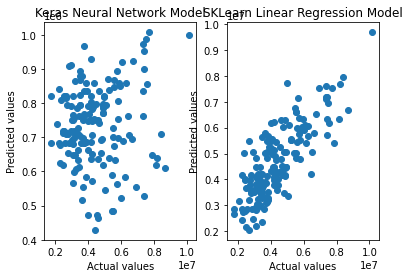

Linear Regression Model Mean Square Error
987387275966.9962


In [17]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

LModel = LinearRegression()
LModel.fit(X_train, Y_train)

Y_predLM = LModel.predict(X_test)

plt.figure(1)
plt.subplot(121)
plt.scatter(Y_test, Y_predKM)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Keras Neural Network Model")

plt.subplot(122)
plt.scatter(Y_test, Y_predLM)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("SKLearn Linear Regression Model")
plt.show()

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, Y_predLM)
print('Linear Regression Model Mean Square Error')
print(mse)